# Logistic Regression using Numpy

## Logistic Regression

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sop

### Read Data

In [2]:
data = pd.read_csv('data/ex2data1.txt', names = ["Exam 1", "Exam 2", "Admitted"])
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values
(m, n) = X.shape

data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam 1      100 non-null float64
Exam 2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


### Plot Data

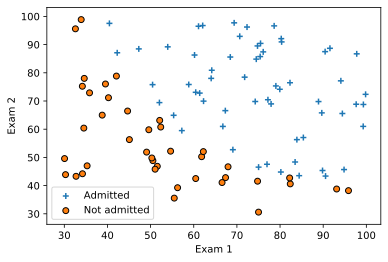

In [4]:
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='+', label = 'Admitted')
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o',  edgecolors='k', label = "Not admitted")
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.legend()
plt.show()

### Model

In [5]:
# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [6]:
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-(1/m) * (y.T @ np.log(h) + ((1 - y).T) @ np.log(1 - h))).item()

def costGradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1/m) * X.T @ (h - y)

In [7]:
# Add intercept for X and transform y into a column-vector
X_inter = np.hstack((np.ones((m, 1)), X))
y = y[:, np.newaxis]

In [8]:
# Test with initial theta:
theta_init = np.zeros((n + 1, 1))
costFunction(theta_init, X_inter, y)

0.6931471805599453

In [9]:
# Learn parameters using scipy.optimize
res = sop.minimize(costFunction, x0 = theta_init.flatten(), 
                   jac=costGradient, args = (X_inter, y.flatten()), method='TNC')
theta_opt = res.x
print(theta_opt)

[-25.16131855   0.20623159   0.20147149]


### Results

In [10]:
# Compute cost function value when using logistic regression with optimal theta
J = costFunction(theta_opt[:,np.newaxis], X_inter, y)
print(J)

0.20349770158947486


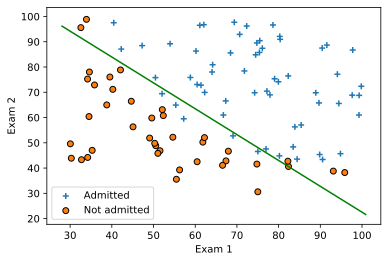

In [11]:
# Plot decision boundary
# Get two endpoints of the line
plot_x = [np.min(X[:,0]-2), np.max(X[:,1]+2)]
# Calculate Line
plot_y = -1/theta_opt[2]*(theta_opt[0] + np.dot(theta_opt[1], plot_x))

plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], marker='+', label = 'Admitted')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], marker='o',  edgecolors='k', label = "Not admitted")
plt.plot(plot_x, plot_y, c='g')
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.legend()
plt.show()

In [12]:
# Predict function
def predict(theta, X):
    return (X @ theta) >= 0.0

In [13]:
# There is a 77.6% chance that a student with test-scores 45 and 85 will be admitted:
sigmoid(np.array([1, 45, 85]) @ theta_opt)

0.7762906215484426

In [14]:
# Calculate percentage of correct classifications
p = predict(theta_opt[:,np.newaxis], X_inter)
np.mean(p == y)

0.89

## Regularized Logistic Regression

### Read Data

In [15]:
data2 = pd.read_csv('data/ex2data2.txt', names = ["Microchip Test 1", "Microchip Test 2", "Accepted"])
X2 = data2.iloc[:,0:2].values
y2 = data2.iloc[:, 2].values
(m2, n2) = X2.shape
data2.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Plot Data

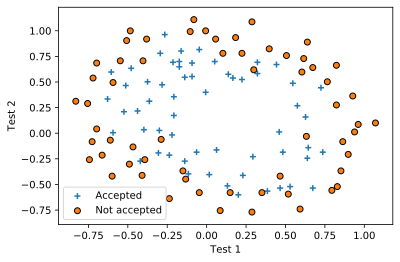

In [16]:
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], marker='+', label = 'Accepted')
plt.scatter(X2[y2 == 0, 0], X2[y2 == 0, 1], marker='o',  edgecolors='k', label = "Not accepted")
plt.ylabel('Test 2')
plt.xlabel('Test 1')
plt.legend()
plt.show()

### Model

In [17]:
def mapFeatures(X1, X2, degree):
    """ Constructs all possible products of powers of the features up to the given degree"""
    if hasattr(X1, "__len__"):
        m = len(X1)
    else:
        m = 1
        
    out = np.ones(m)[:, np.newaxis]
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out = np.hstack((out, ((X1 ** (i-j)) * (X2 ** j))[:, np.newaxis]))
    return out

In [18]:
degree = 6
X2_feature_mapped = mapFeatures(X2[:,0], X2[:,1], degree)

In [19]:
def costFunctionReg(theta, X, y, lam):
    return costFunction(theta, X, y) + lam/(2 * len(y)) * np.sum(theta[1:] ** 2)

def costGradientReg(theta, X, y, lam):
    grad = costGradient(theta, X, y)
    grad[1:] = grad[1:] + lam/len(y) * theta[1:]
    return grad

In [20]:
y2 = y2[:, np.newaxis]
theta_init2 = np.zeros((X2_feature_mapped.shape[1], 1))
lmbda = 1

# Compute cost function for initial parameter values, should be about 0.693
J = costFunctionReg(theta_init2, X2_feature_mapped, y2, lmbda)
print(J)

0.6931471805599454


In [21]:
# Compute gradient of cost function for initial values, first 5 values should be 
# around 0.0085, 0.0188, 0.0001 0.0503 0.0115
J_grad = costGradientReg(theta_init2, X2_feature_mapped, y2, lmbda)
print(J_grad[:5])

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


In [22]:
# Learn parameters using scipy.optimize, minimize expects 1d arrays for vectors 
# so we have to flatten column vectors
res2 = sop.minimize(costFunctionReg, x0 = theta_init2.flatten(), 
                    jac=costGradientReg, args = (X2_feature_mapped, y2.flatten(), lmbda), method='TNC')

### Results

In [23]:
# Best theta
theta_opt2 = res2.x
print(theta_opt2)

[ 1.27271026  0.62529964  1.18111686 -2.01987399 -0.9174319  -1.43166928
  0.12393228 -0.36553118 -0.35725404 -0.17516292 -1.45817009 -0.05098418
 -0.61558556 -0.27469165 -1.19271299 -0.24217841 -0.20603301 -0.04466178
 -0.27778949 -0.29539513 -0.45645981 -1.04319154  0.02779373 -0.29244867
  0.0155576  -0.32742405 -0.1438915  -0.92467488]


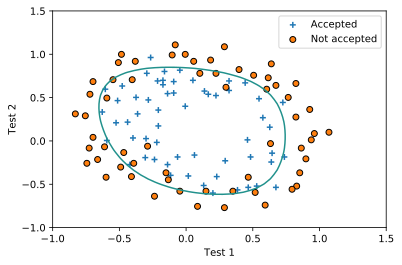

In [24]:
# Plotting the decision boundary
def mapFeaturesForPlotting(X1, X2, degree):
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, X1 ** (i-j) * X2 ** j))
    return out

def plotDecisionBoundary(theta, degree):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeaturesForPlotting(u[i], v[j], degree) @ theta     
    z = z.T
    plt.contour(u, v, z, 0)
    
plt.scatter(X2[y2.flatten() == 1, 0], X2[y2.flatten() == 1, 1], marker='+', label = 'Accepted')
plt.scatter(X2[y2.flatten() == 0, 0], X2[y2.flatten() == 0, 1], marker='o',  edgecolors='k', label = "Not accepted")
plotDecisionBoundary(theta_opt2, degree)
plt.ylabel('Test 2')
plt.xlabel('Test 1')
plt.legend()
plt.show()